In [1]:
import pandas as pd
import warnings as wr
wr.filterwarnings("ignore")
import os
import seaborn as sns
sns.set()
os.getcwd()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
attrition=pd.read_csv("Train_Dataset.csv")
attrition_test=pd.read_csv("Test_Dataset.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
attrition.reset_index(drop=True,inplace=True)
attrition_test.reset_index(drop=True,inplace=True)


In [3]:
attrition.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
attrition.drop(columns="EmployeeID",inplace=True)

In [5]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           5180 non-null   float64
 1   Age                 4864 non-null   float64
 2   TravelProfile       5180 non-null   object 
 3   Department          5056 non-null   object 
 4   HomeToWork          4925 non-null   float64
 5   EducationField      5180 non-null   object 
 6   Gender              5134 non-null   object 
 7   HourlnWeek          4893 non-null   float64
 8   Involvement         5180 non-null   float64
 9   WorkLifeBalance     5180 non-null   float64
 10  Designation         5142 non-null   object 
 11  JobSatisfaction     5180 non-null   float64
 12  ESOPs               5180 non-null   float64
 13  NumCompaniesWorked  5180 non-null   float64
 14  OverTime            5180 non-null   float64
 15  SalaryHikelastYear  5011 non-null   float64
 16  WorkEx

# Data preprocessing

# Missing Values

In [6]:
attrition.isnull().sum()/len(attrition)*100

Attrition             33.674776
Age                   37.720871
TravelProfile         33.674776
Department            35.262484
HomeToWork            36.939821
EducationField        33.674776
Gender                34.263764
HourlnWeek            37.349552
Involvement           33.674776
WorkLifeBalance       33.674776
Designation           34.161332
JobSatisfaction       33.674776
ESOPs                 33.674776
NumCompaniesWorked    33.674776
OverTime              33.674776
SalaryHikelastYear    35.838668
WorkExperience        36.069142
LastPromotion         34.571063
CurrentProfile        37.656850
MaritalStatus         33.674776
MonthlyIncome         34.865557
dtype: float64

In [7]:
attrition.dropna(subset="Attrition",inplace=True)

In [8]:
attrition.isnull().sum()/len(attrition)*100

Attrition             0.000000
Age                   6.100386
TravelProfile         0.000000
Department            2.393822
HomeToWork            4.922780
EducationField        0.000000
Gender                0.888031
HourlnWeek            5.540541
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.733591
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    3.262548
WorkExperience        3.610039
LastPromotion         1.351351
CurrentProfile        6.003861
MaritalStatus         0.000000
MonthlyIncome         1.795367
dtype: float64

In [9]:
df = attrition.select_dtypes(exclude="number")

In [10]:
df.head()

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,M
1,Yes,Sales,Statistics,Female,Executive,Single
2,Rarely,Analytics,Statistics,F,Manager,Single
3,Yes,Sales,Statistics,Female,Manager,Divorsed
4,No,Analytics,Statistics,Female,Manager,Divorsed


In [11]:
df.isnull().sum()

TravelProfile       0
Department        124
EducationField      0
Gender             46
Designation        38
MaritalStatus       0
dtype: int64

In [12]:
def filling_missing_values():
    for i in df:
        df[i]=df[i].fillna(df[i].mode()[0])
filling_missing_values()

In [13]:
df1=attrition.select_dtypes(exclude="object")

In [14]:
df1.head()

,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,18932.0
1,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,18785.0
2,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,22091.0
3,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,20302.0
4,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,21674.0


In [15]:
df1.isnull().sum()

Attrition               0
Age                   316
HomeToWork            255
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MonthlyIncome          93
dtype: int64

In [16]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=11)
new_data=pd.DataFrame(impute.fit_transform(df1),columns=df1.columns)

In [17]:
attrition1=pd.concat([df,new_data],axis=1)

In [18]:
attrition1.head()

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,Rarely,Analytics,CA,Male,Executive,M,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.000000,18932.0
1,Yes,Sales,Statistics,Female,Executive,Single,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.272727,18785.0
2,Rarely,Analytics,Statistics,F,Manager,Single,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,22091.0
3,Yes,Sales,Statistics,Female,Manager,Divorsed,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,20302.0
4,No,Analytics,Statistics,Female,Manager,Divorsed,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,21674.0


In [19]:
attrition1.isnull().sum()

TravelProfile         0
Department            0
EducationField        0
Gender                0
Designation           0
MaritalStatus         0
Attrition             0
Age                   0
HomeToWork            0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MonthlyIncome         0
dtype: int64

# Outliers Treatment

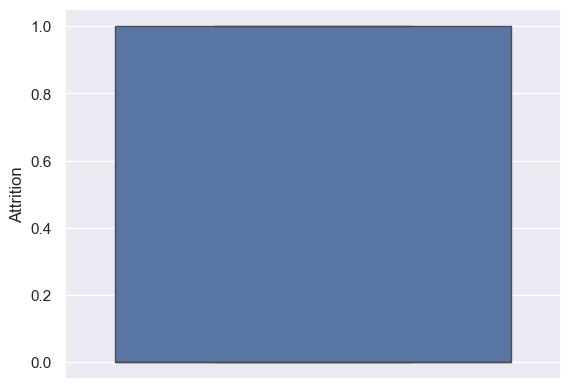

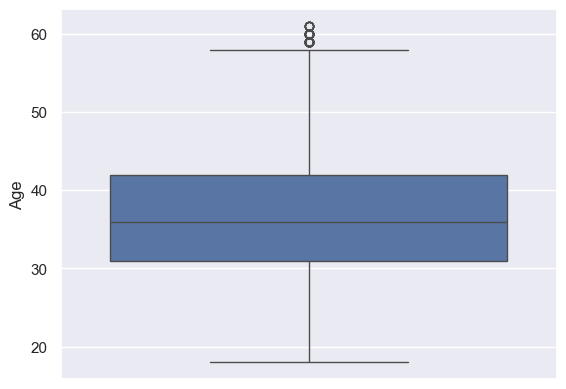

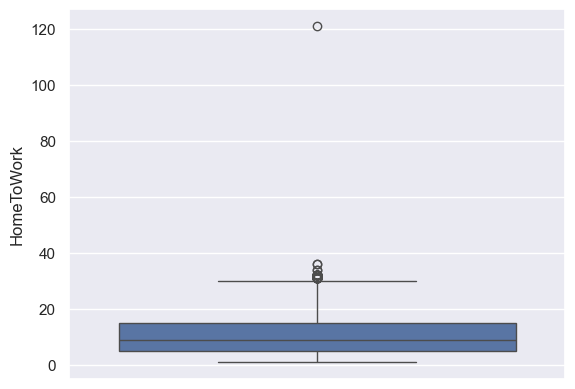

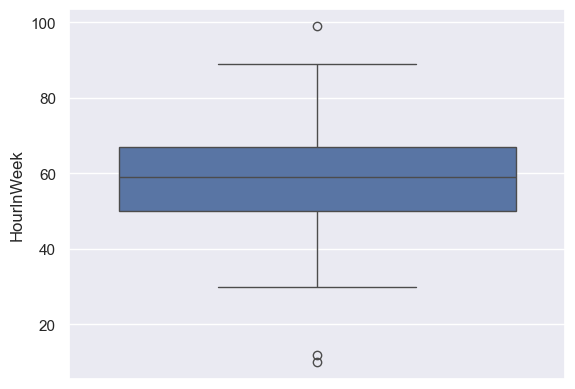

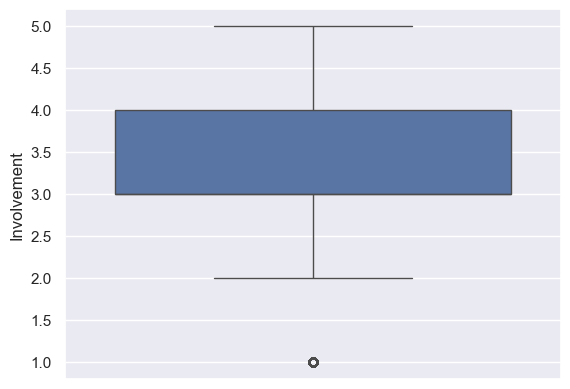

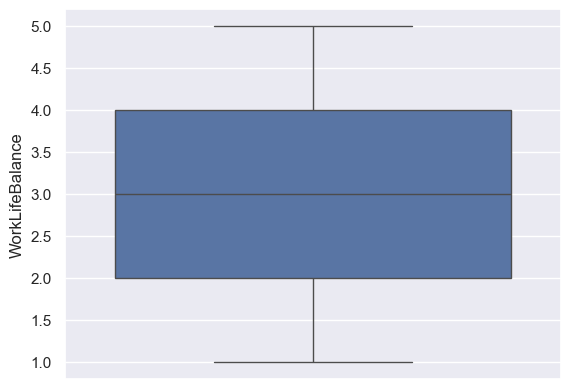

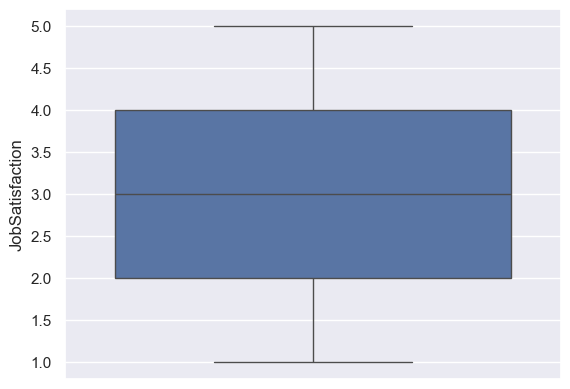

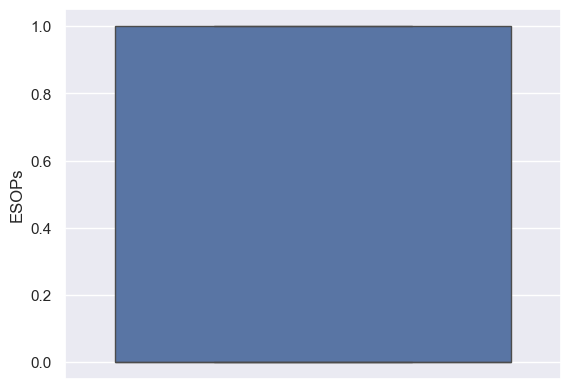

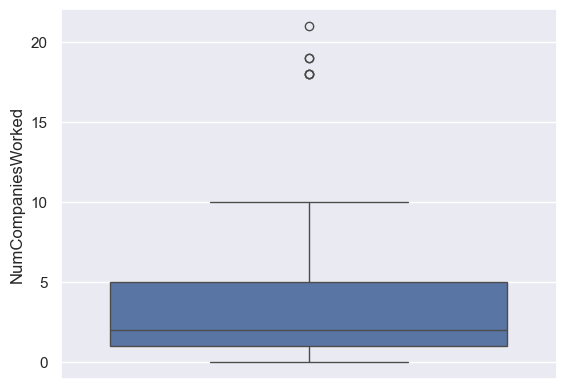

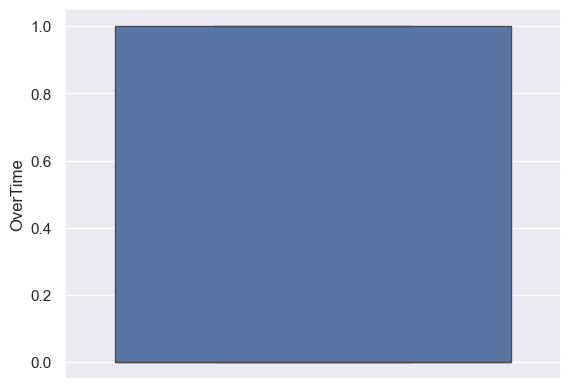

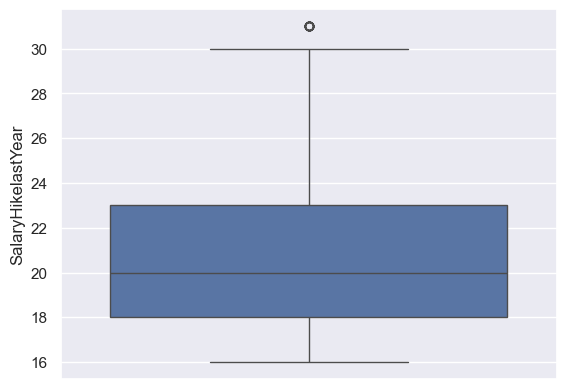

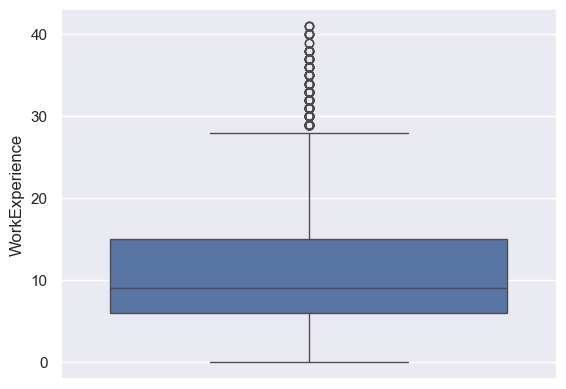

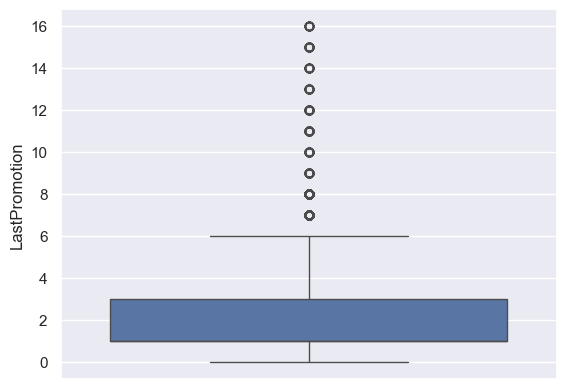

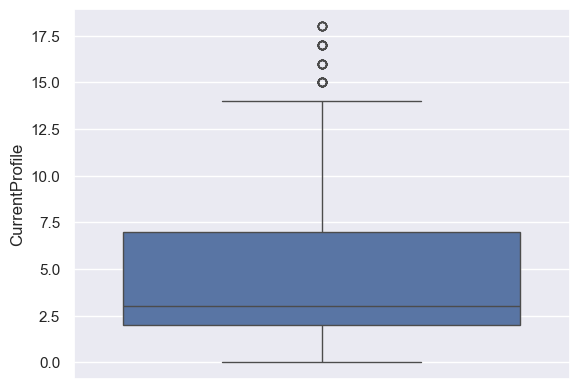

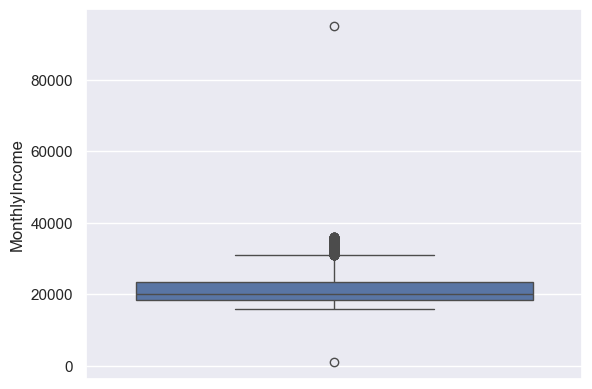

In [20]:
for i in attrition1.select_dtypes(exclude="object"):
    sns.boxplot(attrition1[i])
    plt.show()

In [21]:
X=attrition1.drop(columns="Attrition")
y=attrition1["Attrition"]

In [22]:
X1=X.select_dtypes(exclude="object")

In [23]:
y.value_counts()

Attrition
0.0    3735
1.0    1445
Name: count, dtype: int64

In [24]:
# At one go, we have to use capping method

Q1 =X.select_dtypes(exclude="object").quantile(0.25)
Q3 = X.select_dtypes(exclude="object").quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print(Q1)
print()
print(Q3)
print()
print(IQR)
print()
print(UL)
print()
print(LL) 


Age                      31.0
HomeToWork                5.0
HourlnWeek               50.0
Involvement               3.0
WorkLifeBalance           2.0
JobSatisfaction           2.0
ESOPs                     0.0
NumCompaniesWorked        1.0
OverTime                  0.0
SalaryHikelastYear       18.0
WorkExperience            6.0
LastPromotion             1.0
CurrentProfile            2.0
MonthlyIncome         18351.0
Name: 0.25, dtype: float64

Age                      42.0
HomeToWork               15.0
HourlnWeek               67.0
Involvement               4.0
WorkLifeBalance           4.0
JobSatisfaction           4.0
ESOPs                     1.0
NumCompaniesWorked        5.0
OverTime                  1.0
SalaryHikelastYear       23.0
WorkExperience           15.0
LastPromotion             3.0
CurrentProfile            7.0
MonthlyIncome         23392.0
Name: 0.75, dtype: float64

Age                     11.0
HomeToWork              10.0
HourlnWeek              17.0
Involvement      

In [25]:
X1[((X1 > UL) | (X1 < LL))] = np.nan

In [26]:
X1.isnull().sum()

Age                    69
HomeToWork             76
HourlnWeek              3
Involvement           361
WorkLifeBalance         0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      6
OverTime                0
SalaryHikelastYear     22
WorkExperience        212
LastPromotion         665
CurrentProfile         44
MonthlyIncome         400
dtype: int64

In [27]:
imputed1 = KNNImputer(n_neighbors=11)
X1= pd.DataFrame(imputed1.fit_transform(X1),columns=X1.columns)

In [28]:
X2=X.select_dtypes(exclude="number")

In [29]:
X2.head()

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,M
1,Yes,Sales,Statistics,Female,Executive,Single
2,Rarely,Analytics,Statistics,F,Manager,Single
3,Yes,Sales,Statistics,Female,Manager,Divorsed
4,No,Analytics,Statistics,Female,Manager,Divorsed


In [30]:
X=pd.concat([X1,X2],axis=1)

In [31]:
X.head()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,35.0,5.0,69.0,3.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.000000,18932.0,Rarely,Analytics,CA,Male,Executive,M
1,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.272727,18785.0,Yes,Sales,Statistics,Female,Executive,Single
2,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.000000,22091.0,Rarely,Analytics,Statistics,F,Manager,Single
3,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.000000,20302.0,Yes,Sales,Statistics,Female,Manager,Divorsed
4,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.000000,21674.0,No,Analytics,Statistics,Female,Manager,Divorsed


In [32]:
X.isnull().sum()

Age                   0
HomeToWork            0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MonthlyIncome         0
TravelProfile         0
Department            0
EducationField        0
Gender                0
Designation           0
MaritalStatus         0
dtype: int64

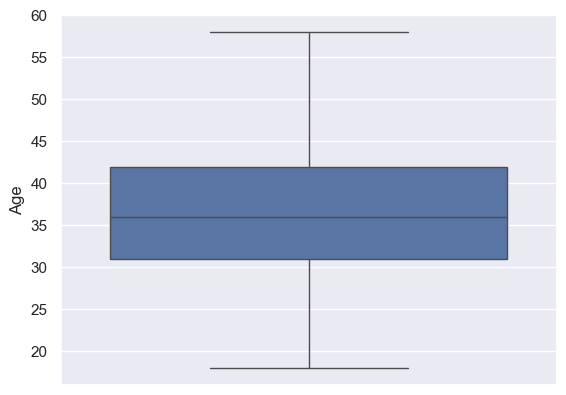

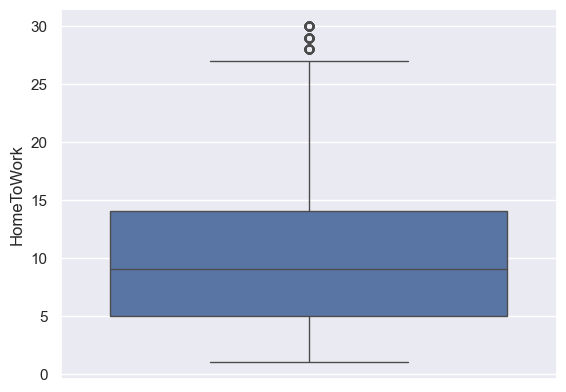

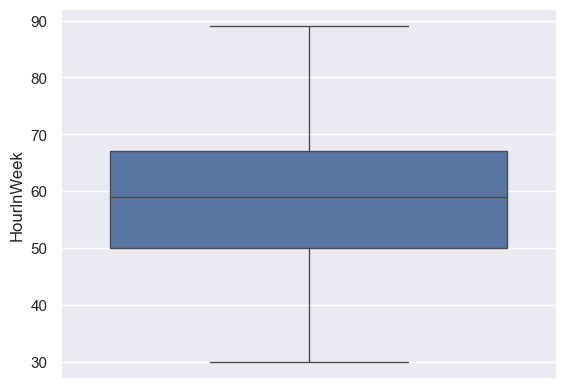

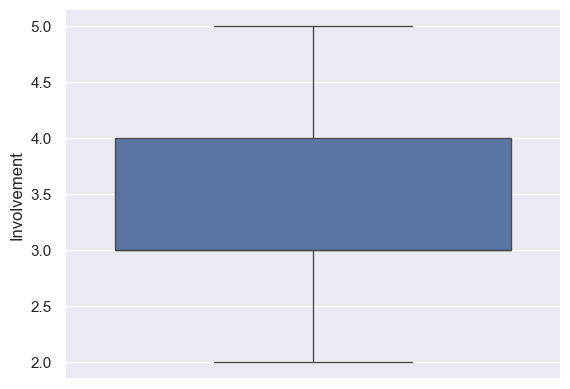

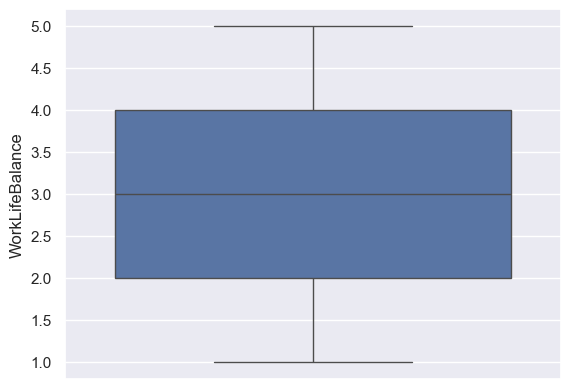

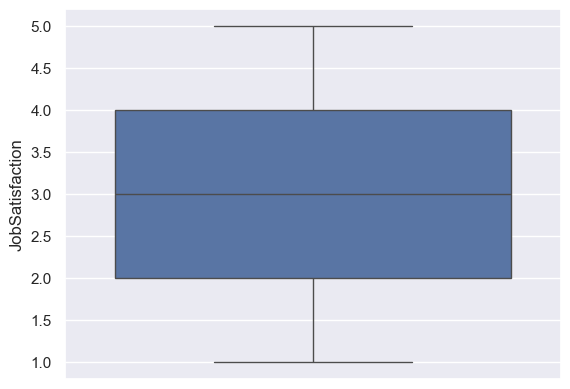

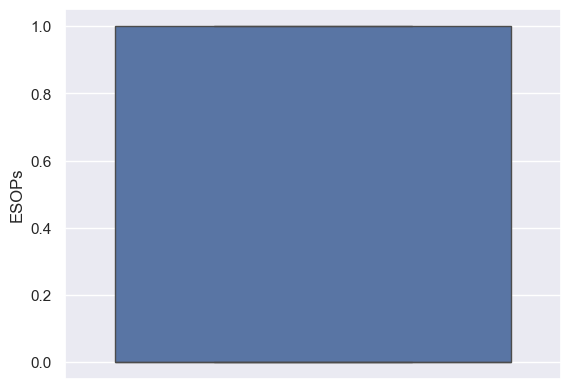

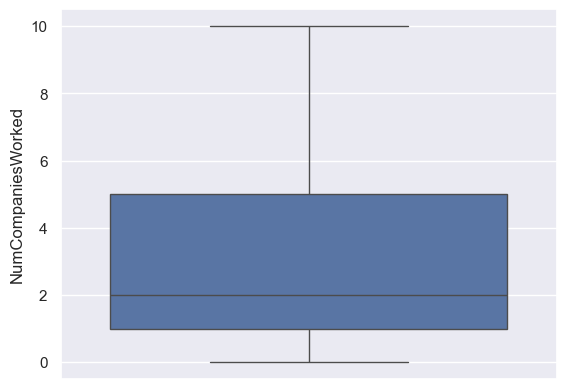

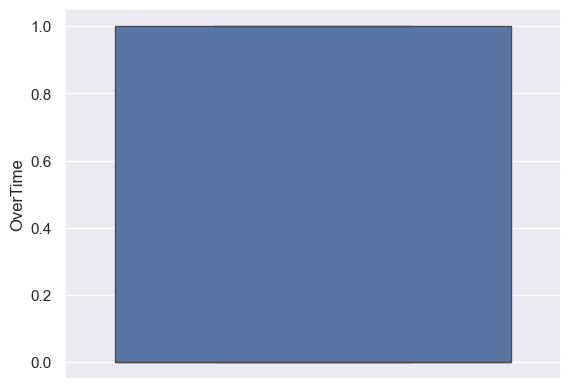

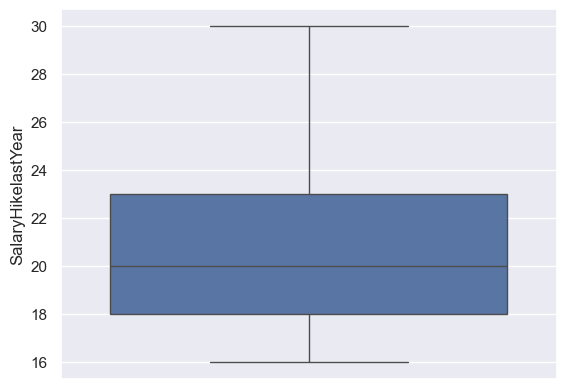

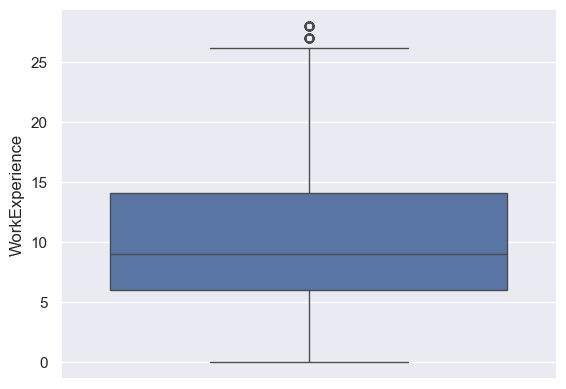

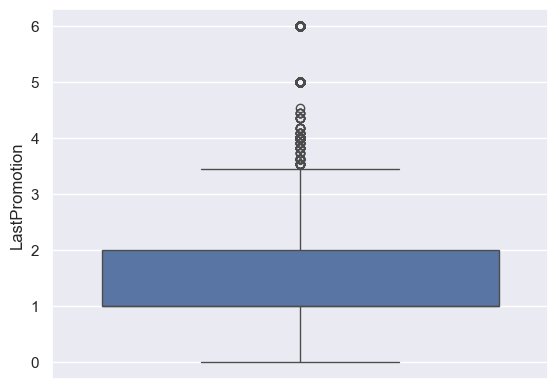

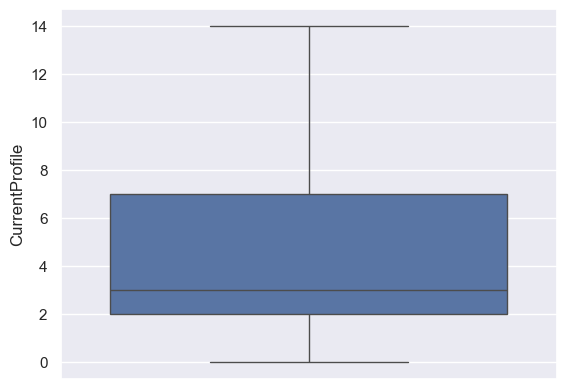

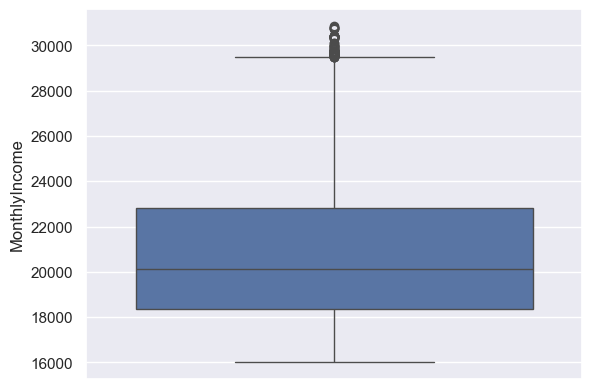

In [33]:
for i in X.select_dtypes(exclude="object"):
    sns.boxplot(X[i])
    plt.show()
    

# EDA

In [34]:
#sns.pairplot(data=X.select_dtypes(exclude="object"))

In [35]:
X["Gender"]=X["Gender"].replace("F","Female")
X["MaritalStatus"]=X["MaritalStatus"].replace("M","Married")

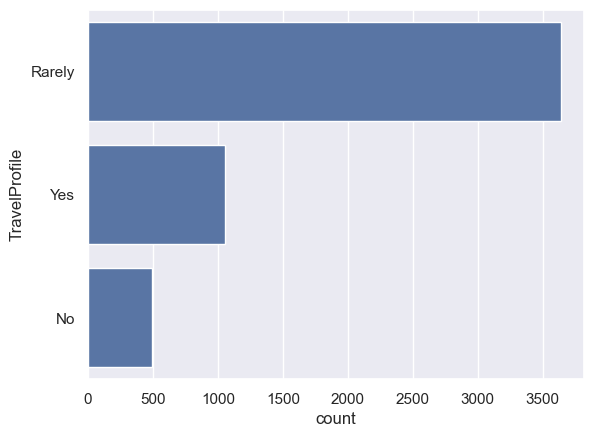

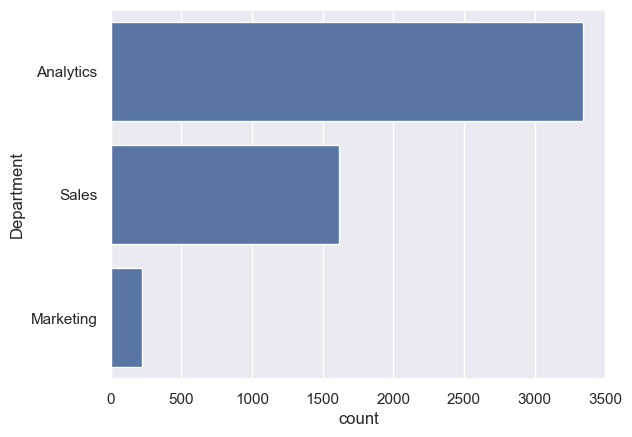

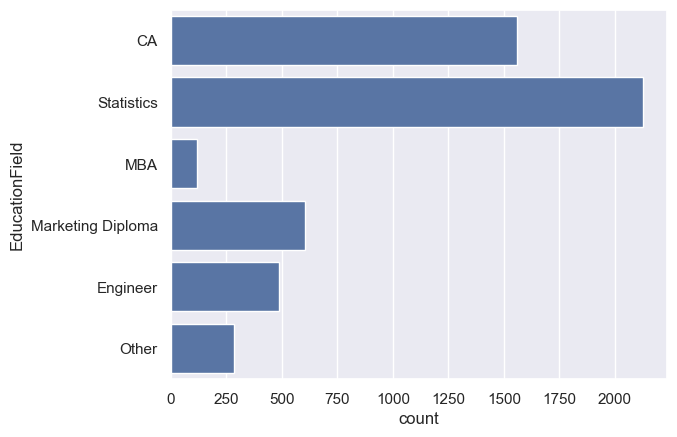

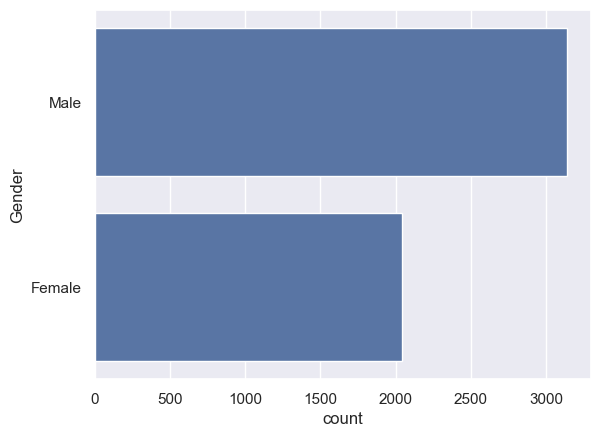

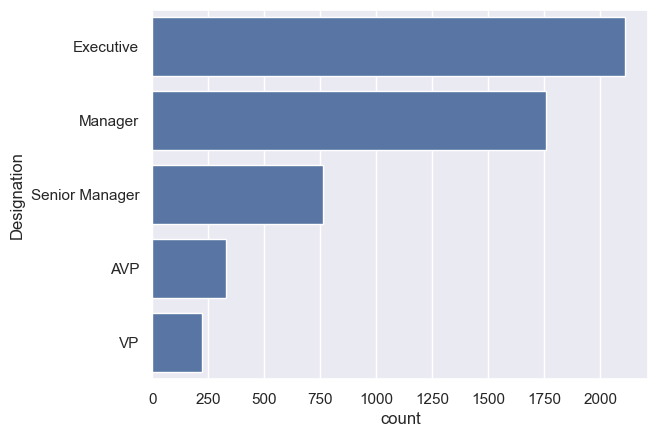

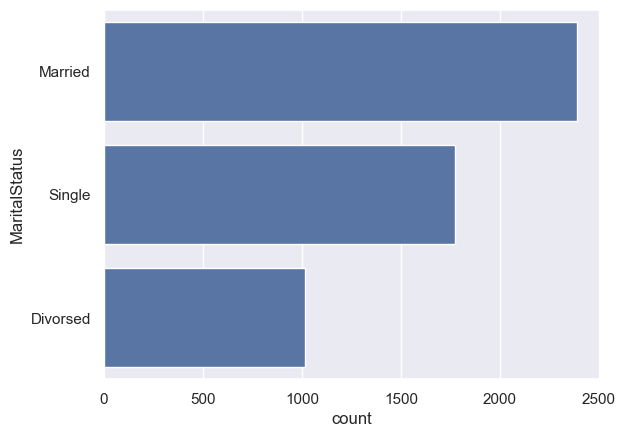

In [36]:
for i in X.select_dtypes(exclude="number"):
    sns.countplot(X[i])
    plt.show()

In [37]:
X["MaritalStatus"].value_counts()

MaritalStatus
Married     2388
Single      1776
Divorsed    1016
Name: count, dtype: int64

In [38]:
X.select_dtypes(exclude="number")

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
0,Rarely,Analytics,CA,Male,Executive,Married
1,Yes,Sales,Statistics,Female,Executive,Single
2,Rarely,Analytics,Statistics,Female,Manager,Single
3,Yes,Sales,Statistics,Female,Manager,Divorsed
4,No,Analytics,Statistics,Female,Manager,Divorsed
5,Yes,Marketing,MBA,Female,Senior Manager,Married
6,Yes,Sales,Marketing Diploma,Female,Senior Manager,Single
7,Rarely,Sales,Marketing Diploma,Male,Manager,Single
8,Yes,Analytics,CA,Male,Senior Manager,Single
9,Rarely,Sales,Statistics,Female,Manager,Single


In [39]:
X=pd.get_dummies(columns=X.select_dtypes(exclude="number").columns,drop_first=True,dtype=int,data=X)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               5180 non-null   float64
 1   HomeToWork                        5180 non-null   float64
 2   HourlnWeek                        5180 non-null   float64
 3   Involvement                       5180 non-null   float64
 4   WorkLifeBalance                   5180 non-null   float64
 5   JobSatisfaction                   5180 non-null   float64
 6   ESOPs                             5180 non-null   float64
 7   NumCompaniesWorked                5180 non-null   float64
 8   OverTime                          5180 non-null   float64
 9   SalaryHikelastYear                5180 non-null   float64
 10  WorkExperience                    5180 non-null   float64
 11  LastPromotion                     5180 non-null   float64
 12  Curren

# imbalanced Treatment

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)


# Train_test split

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

# Training the model

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# GaussianNB

In [44]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [45]:
y_train_pred=GNB.predict(X_train)
y_test_pred=GNB.predict(X_test)

# Model Evaluation

In [46]:
from sklearn import metrics

In [47]:
metrics.confusion_matrix(y_train,y_train_pred)

array([[1971, 1022],
       [ 765, 2218]], dtype=int64)

In [48]:
metrics.confusion_matrix(y_test,y_test_pred)


array([[500, 242],
       [190, 562]], dtype=int64)

In [49]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69      2993
         1.0       0.68      0.74      0.71      2983

    accuracy                           0.70      5976
   macro avg       0.70      0.70      0.70      5976
weighted avg       0.70      0.70      0.70      5976



In [50]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.67      0.70       742
         1.0       0.70      0.75      0.72       752

    accuracy                           0.71      1494
   macro avg       0.71      0.71      0.71      1494
weighted avg       0.71      0.71      0.71      1494



# Random Forest

In [51]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

In [53]:
metrics.confusion_matrix(y_train,y_train_pred)

array([[2993,    0],
       [   0, 2983]], dtype=int64)

In [54]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[728,  14],
       [ 19, 733]], dtype=int64)

In [55]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2993
         1.0       1.00      1.00      1.00      2983

    accuracy                           1.00      5976
   macro avg       1.00      1.00      1.00      5976
weighted avg       1.00      1.00      1.00      5976



In [56]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       742
         1.0       0.98      0.97      0.98       752

    accuracy                           0.98      1494
   macro avg       0.98      0.98      0.98      1494
weighted avg       0.98      0.98      0.98      1494



# Logistic Regression

In [57]:
Logit=LogisticRegression(max_iter=5000)
Logit.fit(X_train,y_train)


LogisticRegression(max_iter=5000)

In [58]:
y_train_pred=Logit.predict(X_train)
y_test_pred=Logit.predict(X_test)

In [59]:
metrics.confusion_matrix(y_train,y_train_pred)

array([[2225,  768],
       [ 691, 2292]], dtype=int64)

In [60]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[567, 175],
       [179, 573]], dtype=int64)

In [61]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      2993
         1.0       0.75      0.77      0.76      2983

    accuracy                           0.76      5976
   macro avg       0.76      0.76      0.76      5976
weighted avg       0.76      0.76      0.76      5976



In [62]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       742
         1.0       0.77      0.76      0.76       752

    accuracy                           0.76      1494
   macro avg       0.76      0.76      0.76      1494
weighted avg       0.76      0.76      0.76      1494



# Gradient

In [63]:
gradient=GradientBoostingClassifier(n_estimators=250,random_state=101)
gradient.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=250, random_state=101)

In [64]:
y_train_pred=gradient.predict(X_train)
y_test_pred=gradient.predict(X_test)


In [65]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[697,  45],
       [ 81, 671]], dtype=int64)

In [66]:
metrics.confusion_matrix(y_train,y_train_pred)

array([[2899,   94],
       [ 193, 2790]], dtype=int64)

In [67]:
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2993
         1.0       0.97      0.94      0.95      2983

    accuracy                           0.95      5976
   macro avg       0.95      0.95      0.95      5976
weighted avg       0.95      0.95      0.95      5976



In [68]:
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       742
         1.0       0.94      0.89      0.91       752

    accuracy                           0.92      1494
   macro avg       0.92      0.92      0.92      1494
weighted avg       0.92      0.92      0.92      1494



# predectict on test data

In [69]:
attrition_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,Executive,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,Executive,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,Executive,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,Manager,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,Senior Manager,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [70]:
attrition_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [71]:
attrition_test.dropna(inplace=True)

In [72]:
attrition_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 2 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          1738 non-null   int64  
 1   Age                 1738 non-null   float64
 2   TravelProfile       1738 non-null   object 
 3   Department          1738 non-null   object 
 4   HomeToWork          1738 non-null   float64
 5   EducationField      1738 non-null   object 
 6   Gender              1738 non-null   object 
 7   HourlnWeek          1738 non-null   float64
 8   Involvement         1738 non-null   int64  
 9   WorkLifeBalance     1738 non-null   int64  
 10  Designation         1738 non-null   object 
 11  JobSatisfaction     1738 non-null   int64  
 12  ESOPs               1738 non-null   int64  
 13  NumCompaniesWorked  1738 non-null   int64  
 14  OverTime            1738 non-null   int64  
 15  SalaryHikelastYear  1738 non-null   float64
 16  WorkExperie

In [73]:
attrition_test.isnull().sum()

EmployeeID            0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [74]:
attrition_test["MaritalStatus"]=attrition_test["MaritalStatus"].replace("M","Married")
attrition_test["Gender"]=attrition_test["Gender"].replace("F","Female")
Id=attrition_test[["EmployeeID"]]
Id.isnull().sum(),Id.shape

(EmployeeID    0
 dtype: int64,
 (1738, 1))

In [75]:
X_test1=attrition_test.drop(columns=["EmployeeID"])


In [76]:
X_test1=pd.get_dummies(columns=X_test1.select_dtypes(exclude="number").columns,drop_first=True,dtype=int,data=X_test1)

In [77]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 2 to 2629
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1738 non-null   float64
 1   HomeToWork                        1738 non-null   float64
 2   HourlnWeek                        1738 non-null   float64
 3   Involvement                       1738 non-null   int64  
 4   WorkLifeBalance                   1738 non-null   int64  
 5   JobSatisfaction                   1738 non-null   int64  
 6   ESOPs                             1738 non-null   int64  
 7   NumCompaniesWorked                1738 non-null   int64  
 8   OverTime                          1738 non-null   int64  
 9   SalaryHikelastYear                1738 non-null   float64
 10  WorkExperience                    1738 non-null   float64
 11  LastPromotion                     1738 non-null   float64
 12  CurrentProf

# Forest

In [78]:
y_test_pred=forest.predict(X_test1)
y_test_pred=pd.DataFrame(y_test_pred,columns=["Attrition"],dtype=int)
y_test_pred.shape,y_test_pred.isnull().sum(),Id.shape

((1738, 1),
 Attrition    0
 dtype: int64,
 (1738, 1))

In [93]:
forest.feature_importances_

array([0.07389245, 0.06181362, 0.0623921 , 0.03400422, 0.03272998,
       0.05274676, 0.03252622, 0.05162908, 0.10990156, 0.04784447,
       0.0705669 , 0.03611991, 0.05951827, 0.08026315, 0.01368855,
       0.01166125, 0.00273759, 0.0145317 , 0.00905873, 0.00219729,
       0.00708514, 0.00453687, 0.01550108, 0.01353491, 0.02326591,
       0.01283909, 0.00761277, 0.00248828, 0.0380695 , 0.01524265])

In [98]:
feature_importance = pd.DataFrame({'features':X.columns,'score':forest.feature_importances_})
feature_importance.sort_values(by='score',ascending=False,inplace=True)
feature_importance.reset_index(drop=True,inplace=True)

[Text(0, 0, '0.11'),
 Text(0, 0, '0.08'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.07'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.06'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0.03'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.02'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.00'),
 Text(0, 0, '0.00'),
 Text(0, 0, '0.00'),
 Text(0, 0, '0.00')]

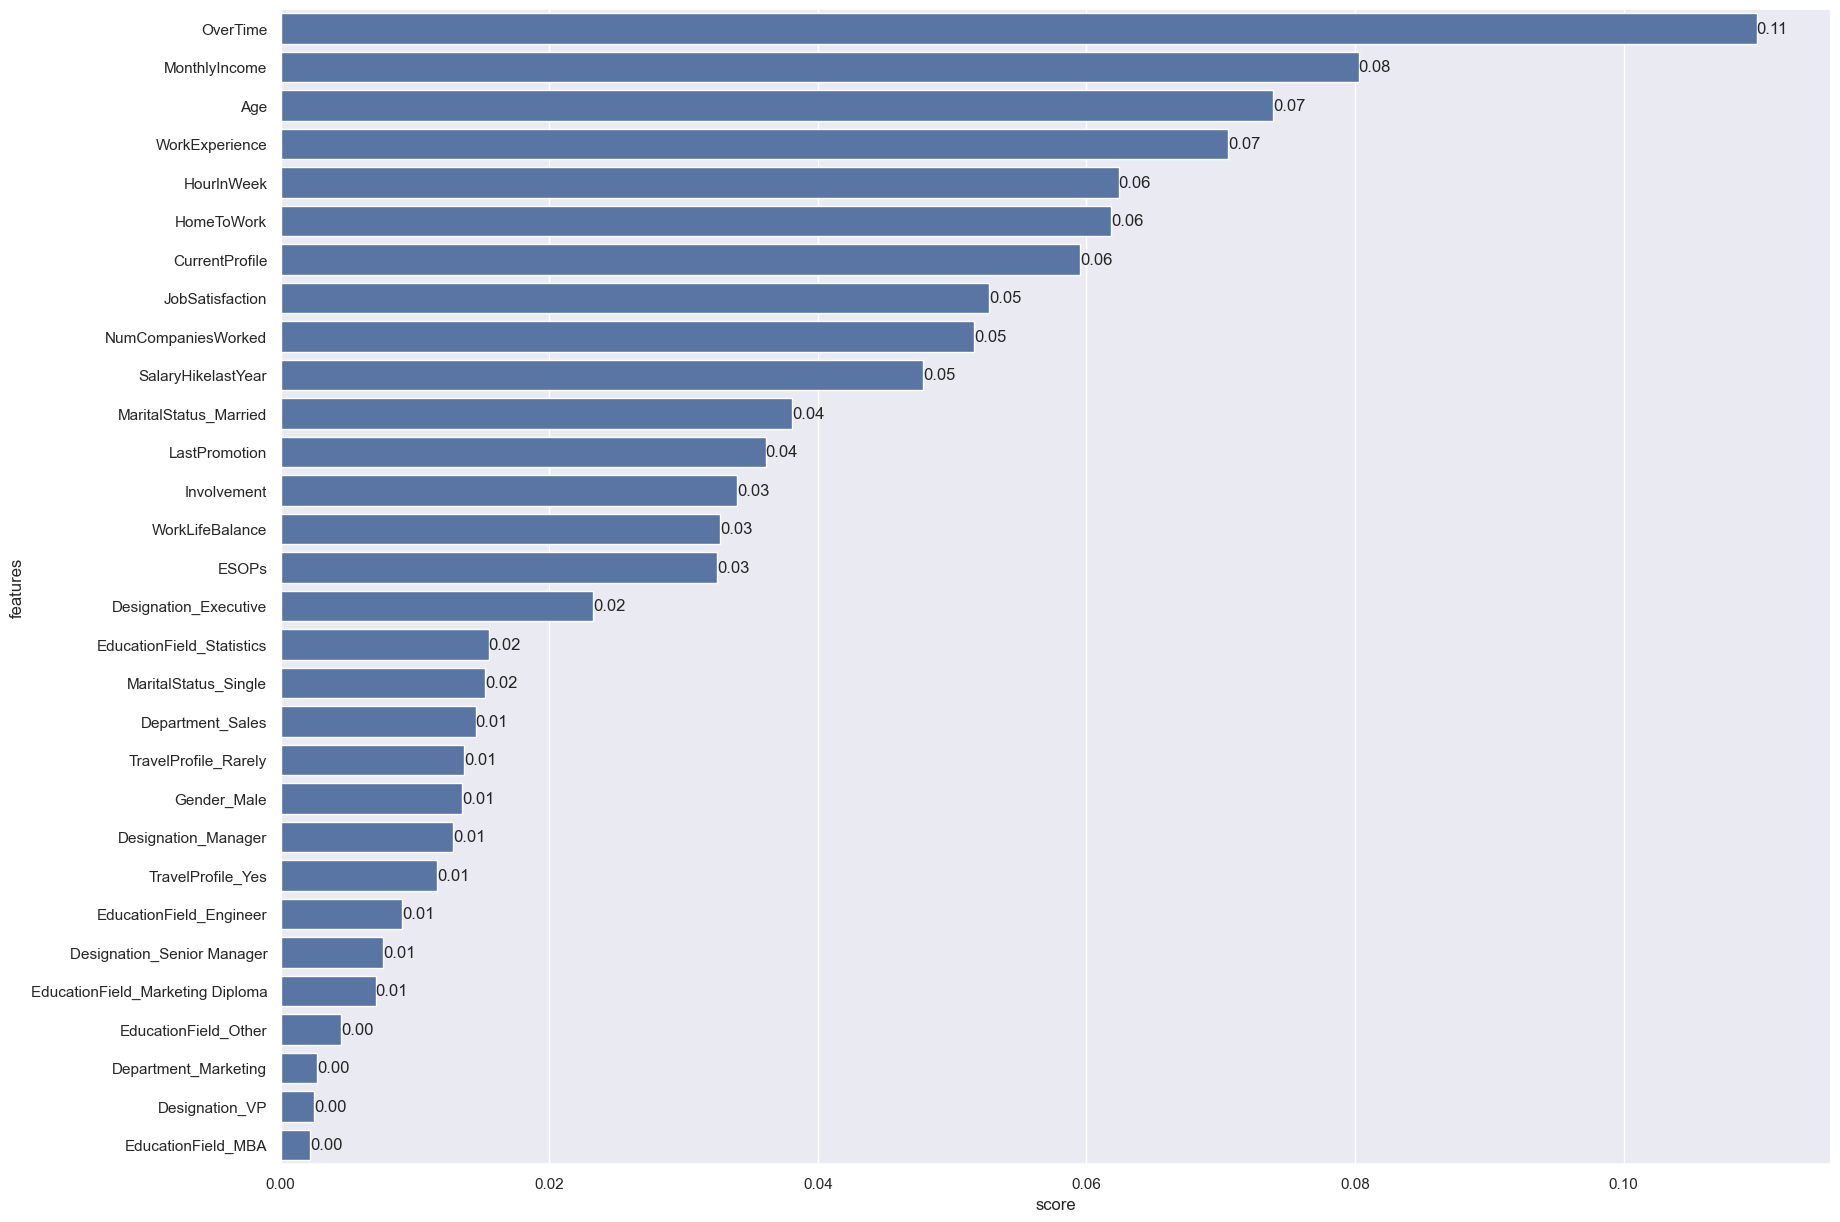

In [101]:
plt.figure(figsize=(20,15))
bar_plot=sns.barplot(x='score',y='features',data=feature_importance)
bar_container = bar_plot.containers[0]
bar_plot.bar_label(bar_container, fmt='%.2f')

In [83]:
final_report=pd.concat([Id.reset_index(drop=True),y_test_pred.reset_index(drop=True)],axis=1)

In [84]:
final_report.isnull().sum()

EmployeeID    0
Attrition     0
dtype: int64

In [92]:
final_report.to_csv('final_submission',index=False)